In [2]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Customizing Output options
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 50)
sns.set(color_codes=True)

In [5]:
train_data = pd.read_pickle("./train_data_updated.pkl")

In [3]:
#train_data_updated = pd.read_pickle("./train_data_updated.pkl")

In [6]:
#Converting numeric values into categories so that encodings can be applied later.
for col in ['visit_year','visit_month','visit_weekday','holiday_flg']:
    train_data[col] = train_data[col].astype('category')

In [7]:
train_data.sort_values(by='visit_date').head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,reserve_visitors,Time_Difference,visit_time,reserve_time,visit_year,visit_month,visit_weekday,city,ward,neighborhood,holiday_flg
119146,air_b2d8bc9c88b85f96,2016-01-01,16,Dining bar,Fukuoka-ken Fukuoka-shi Tenjin,0.0,0.0,0.0,0.0,2016,1,4,Fukuoka-ken,Fukuoka-shi,Tenjin,1
79537,air_536043fcf1a4f8a4,2016-01-01,42,Bar/Cocktail,Ōsaka-fu Ōsaka-shi Kyūtarōmachi,0.0,0.0,0.0,0.0,2016,1,4,Ōsaka-fu,Ōsaka-shi,Kyūtarōmachi,1
105397,air_a083834e7ffe187e,2016-01-01,27,Izakaya,Miyagi-ken Sendai-shi Kamisugi,0.0,0.0,0.0,0.0,2016,1,4,Miyagi-ken,Sendai-shi,Kamisugi,1
77925,air_db4b38ebe7a7ceff,2016-01-01,21,Dining bar,Ōsaka-fu Ōsaka-shi Shinmachi,9.0,0.0,19.0,19.0,2016,1,4,Ōsaka-fu,Ōsaka-shi,Shinmachi,1
158788,air_70e9e8cd55879414,2016-01-01,4,Bar/Cocktail,Tōkyō-to Shibuya-ku Dōgenzaka,0.0,0.0,0.0,0.0,2016,1,4,Tōkyō-to,Shibuya-ku,Dōgenzaka,1


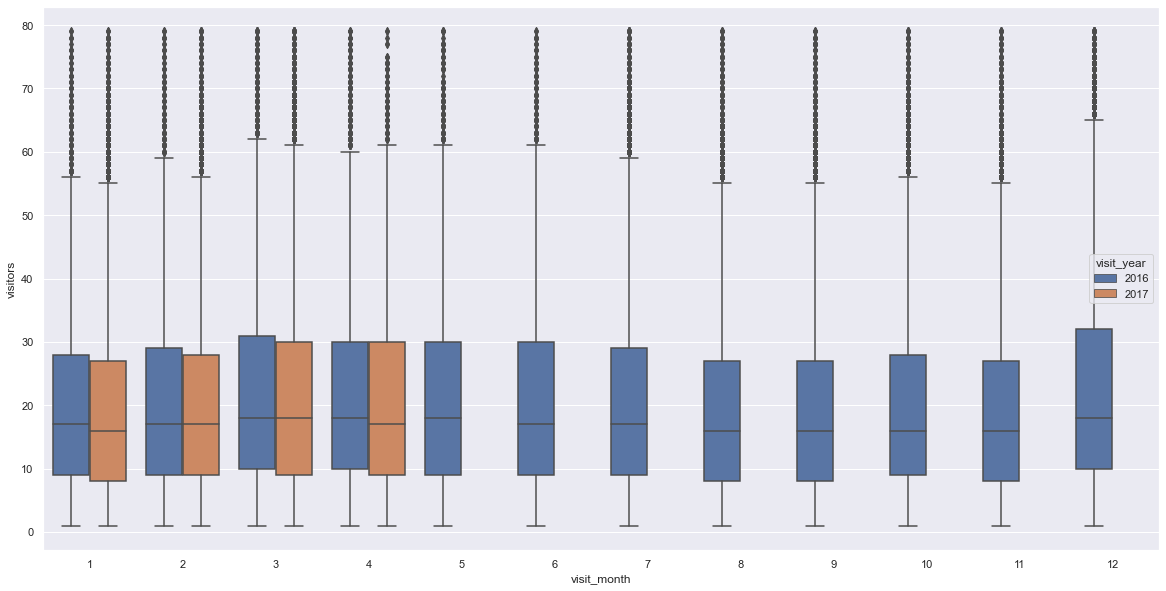

In [8]:
plt.figure(figsize=(20,10))
sns.boxplot(y='visitors',x='visit_month',data=train_data[(train_data.visitors < 80)],hue='visit_year')
plt.show()


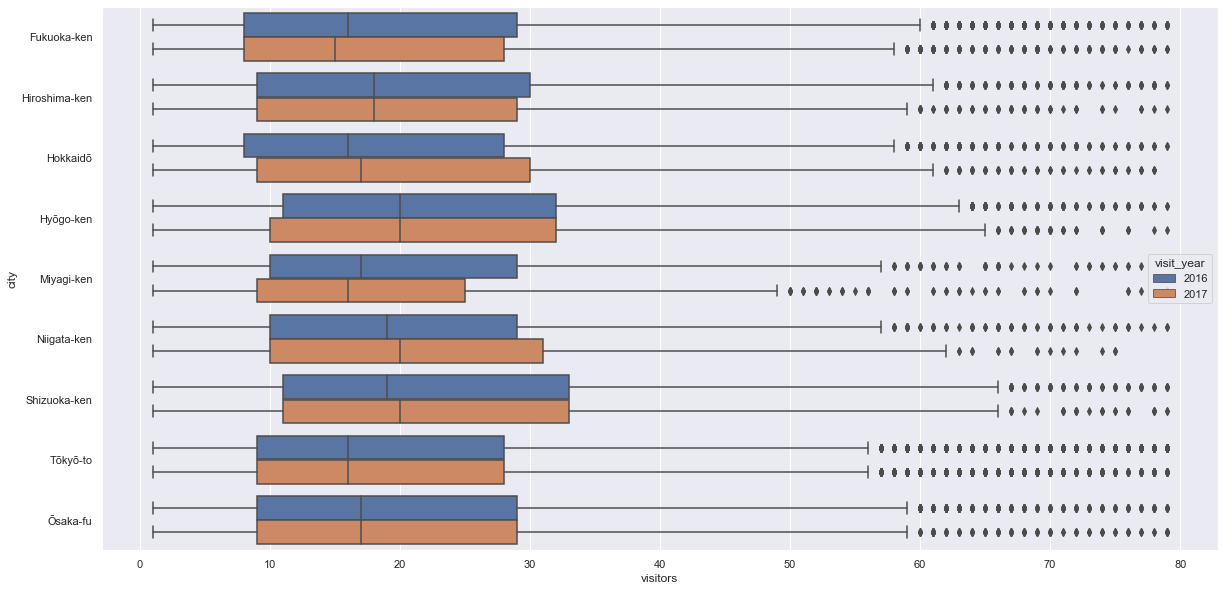

In [9]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='city',data=train_data[(train_data.visitors < 80)],hue='visit_year')
plt.show()

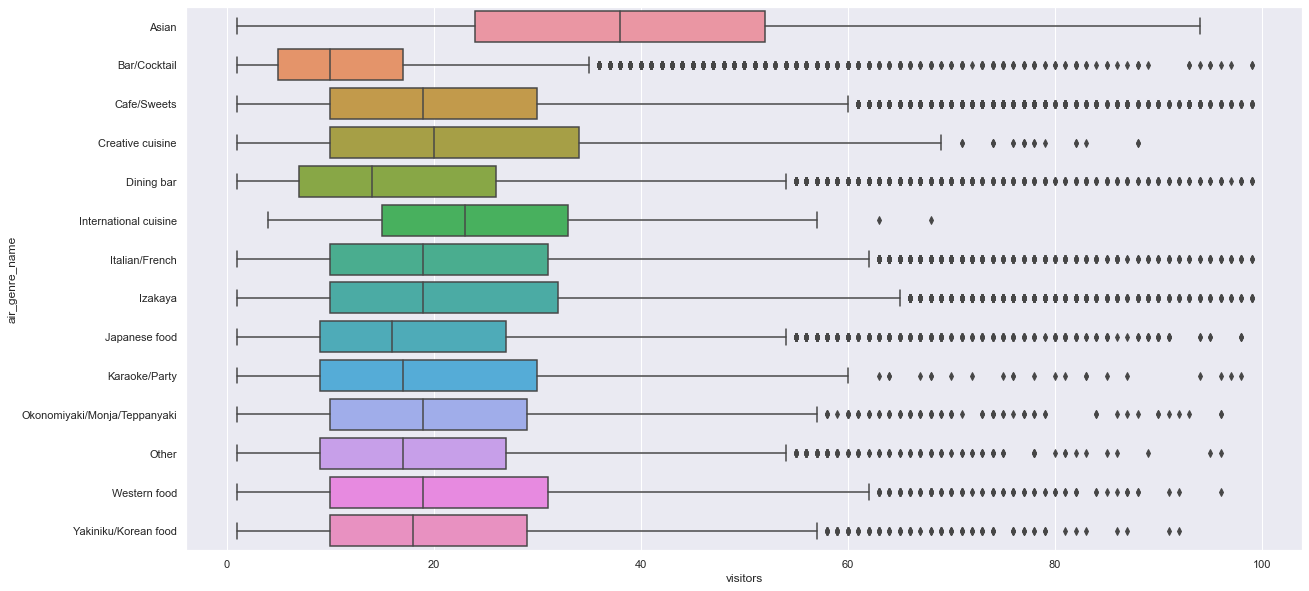

In [98]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='air_genre_name',data=train_data[(train_data.visitors < 100)])
plt.show()

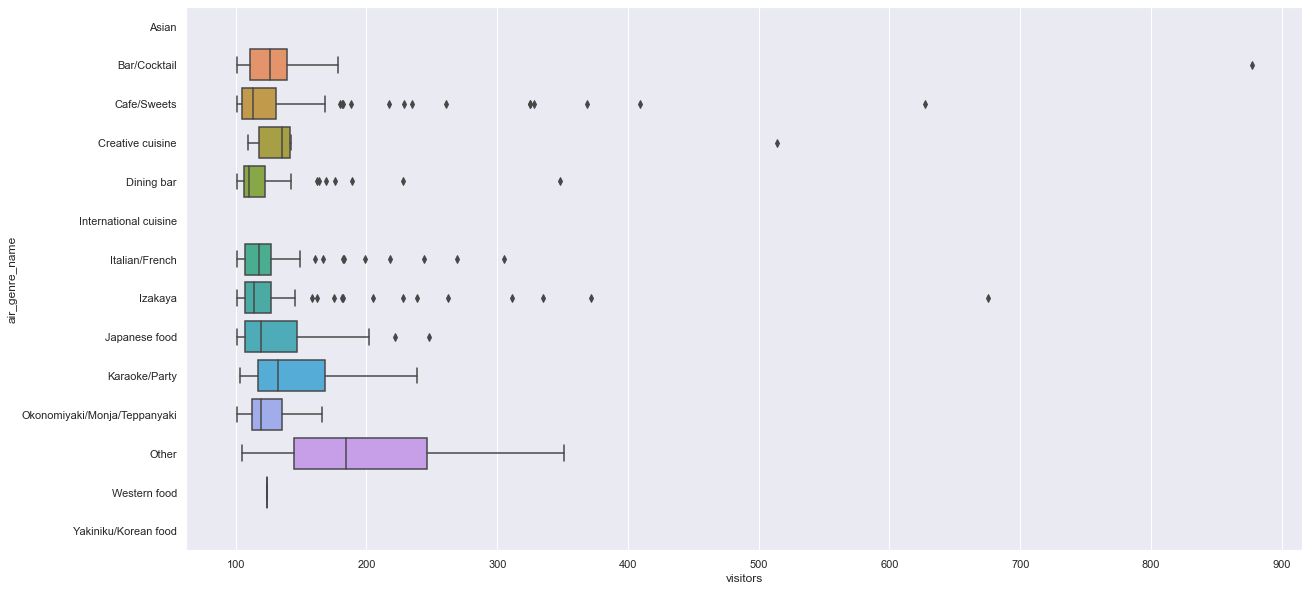

In [97]:
plt.figure(figsize=(20,10))
sns.boxplot(x='visitors',y='air_genre_name',data=train_data[(train_data.visitors > 100)])
plt.show()

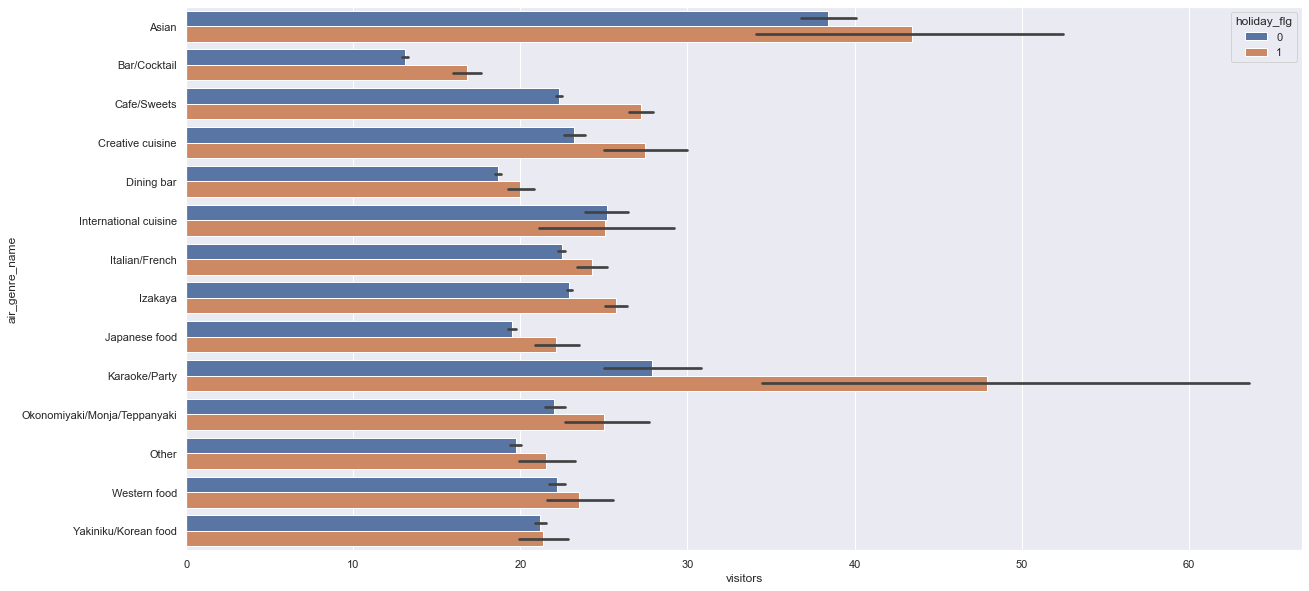

In [11]:
plt.figure(figsize=(20,10))
sns.barplot(x='visitors',y='air_genre_name',data=train_data,hue='holiday_flg')
plt.show()

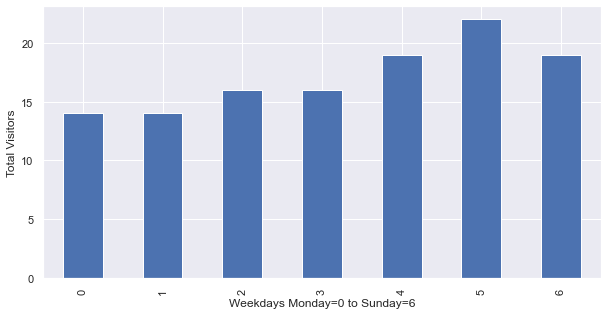

In [12]:
temp = train_data.groupby('visit_weekday')['visitors'].median()
temp.plot(kind='bar',xlabel = "Weekdays Monday=0 to Sunday=6",ylabel="Total Visitors",figsize=(10,5))
plt.show()

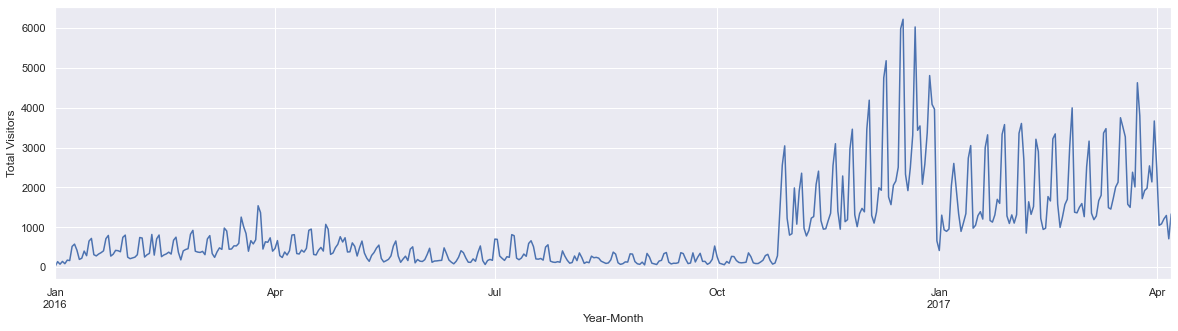

In [13]:
temp = train_data.groupby('visit_date')['reserve_visitors'].sum()
temp.plot(kind='line',xlabel="Year-Month",ylabel="Total Visitors",figsize=(20,5))
plt.show()

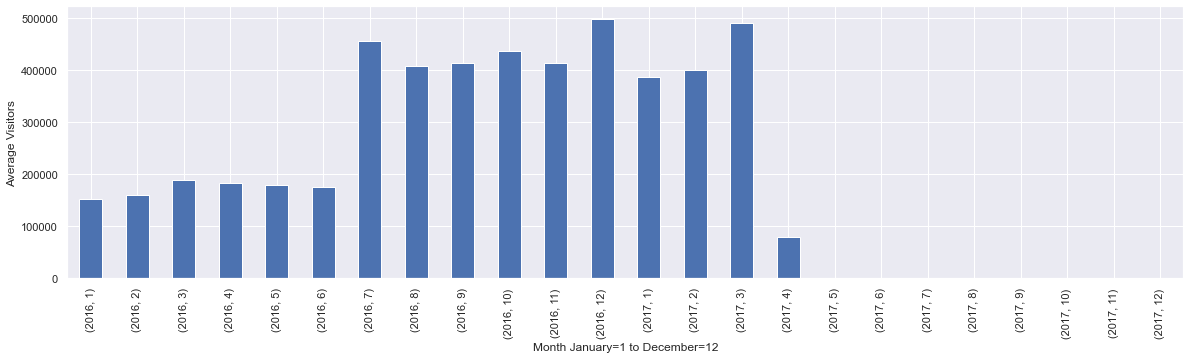

In [14]:
temp = train_data.groupby(['visit_year','visit_month'])['visitors'].sum()
temp.plot(kind='bar',xlabel = "Month January=1 to December=12",ylabel="Average Visitors",figsize=(20,5))
plt.show()

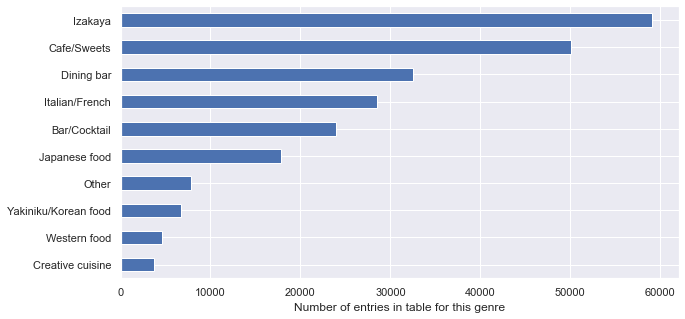

In [15]:
temp = train_data['air_genre_name'].value_counts()
temp.nlargest(10).sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of entries in table for this genre")
plt.show()

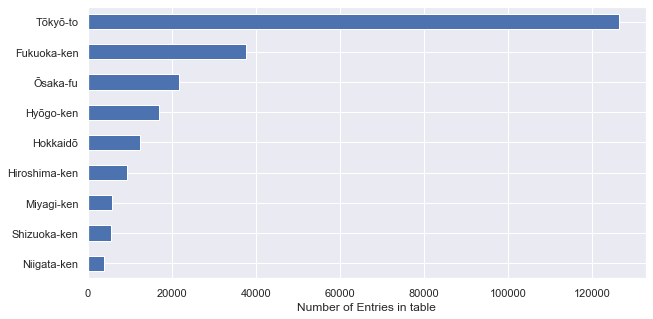

In [16]:
temp = train_data['city'].value_counts()
temp.sort_values().plot(kind='barh',figsize=(10,5))
plt.xlabel("Number of Entries in table")
plt.show()

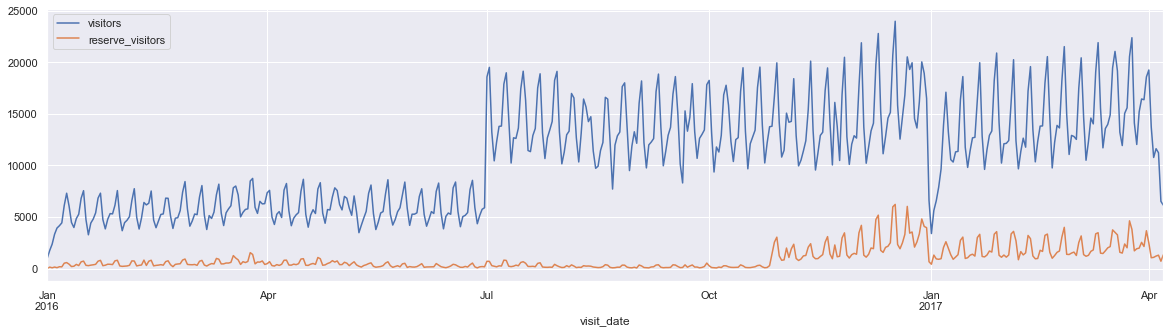

In [17]:
train_data.groupby('visit_date').sum()[['visitors','reserve_visitors']].plot(figsize=(20,5))
plt.show()

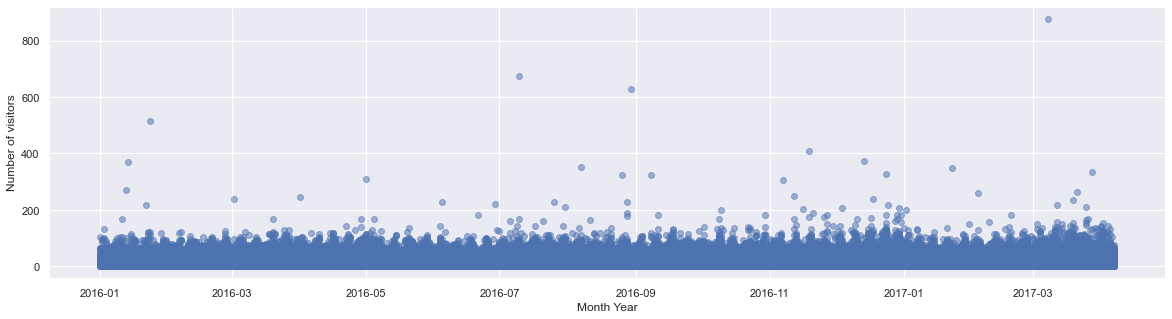

In [18]:
fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(train_data["visit_date"], train_data["visitors"],alpha=0.5)
plt.xlabel("Month Year")
plt.ylabel("Number of visitors")
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


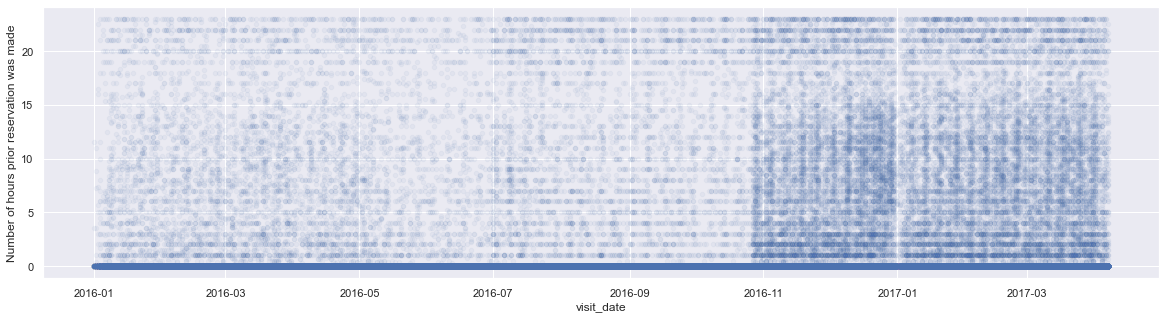

In [45]:
train_data[['visit_date','Time_Difference']].plot(x='visit_date',y='Time_Difference', figsize=(20,5),kind='scatter',alpha = 0.05)
plt.ylabel("Number of hours prior reservation was made")
plt.show()

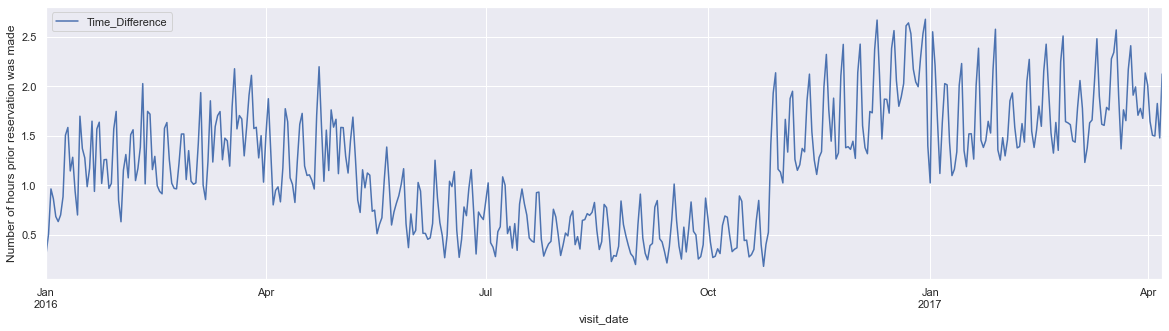

In [73]:
temp =train_data[['visit_date','Time_Difference']].groupby('visit_date').mean().reset_index()
temp.plot(x='visit_date',y='Time_Difference', figsize=(20,5),kind='line')
plt.ylabel("Number of hours prior reservation was made")
plt.show()

In [20]:
train_data

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,reserve_visitors,Time_Difference,visit_time,reserve_time,visit_year,visit_month,visit_weekday,city,ward,neighborhood,holiday_flg
0,air_e3020992d5fe5dfd,2016-07-01,21,Italian/French,Tōkyō-to Chūō-ku Tsukiji,0.0,0.0,0.0,0.0,2016,7,4,Tōkyō-to,Chūō-ku,Tsukiji,0
1,air_e3020992d5fe5dfd,2016-07-02,19,Italian/French,Tōkyō-to Chūō-ku Tsukiji,0.0,0.0,0.0,0.0,2016,7,5,Tōkyō-to,Chūō-ku,Tsukiji,0
2,air_e3020992d5fe5dfd,2016-07-04,8,Italian/French,Tōkyō-to Chūō-ku Tsukiji,0.0,0.0,0.0,0.0,2016,7,0,Tōkyō-to,Chūō-ku,Tsukiji,0
3,air_e3020992d5fe5dfd,2016-07-05,11,Italian/French,Tōkyō-to Chūō-ku Tsukiji,0.0,0.0,0.0,0.0,2016,7,1,Tōkyō-to,Chūō-ku,Tsukiji,0
4,air_e3020992d5fe5dfd,2016-07-06,16,Italian/French,Tōkyō-to Chūō-ku Tsukiji,0.0,0.0,0.0,0.0,2016,7,2,Tōkyō-to,Chūō-ku,Tsukiji,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239668,air_4ce7b17062a1bf73,2017-03-30,15,Italian/French,Tōkyō-to Minato-ku Shibakōen,0.0,0.0,0.0,0.0,2017,3,3,Tōkyō-to,Minato-ku,Shibakōen,0
239669,air_4ce7b17062a1bf73,2017-03-31,14,Italian/French,Tōkyō-to Minato-ku Shibakōen,0.0,0.0,0.0,0.0,2017,3,4,Tōkyō-to,Minato-ku,Shibakōen,0
239670,air_4ce7b17062a1bf73,2017-04-01,9,Italian/French,Tōkyō-to Minato-ku Shibakōen,0.0,0.0,0.0,0.0,2017,4,5,Tōkyō-to,Minato-ku,Shibakōen,0
239671,air_4ce7b17062a1bf73,2017-04-03,11,Italian/French,Tōkyō-to Minato-ku Shibakōen,0.0,0.0,0.0,0.0,2017,4,0,Tōkyō-to,Minato-ku,Shibakōen,0


Text(0, 0.5, 'Mean visitors / Hours')

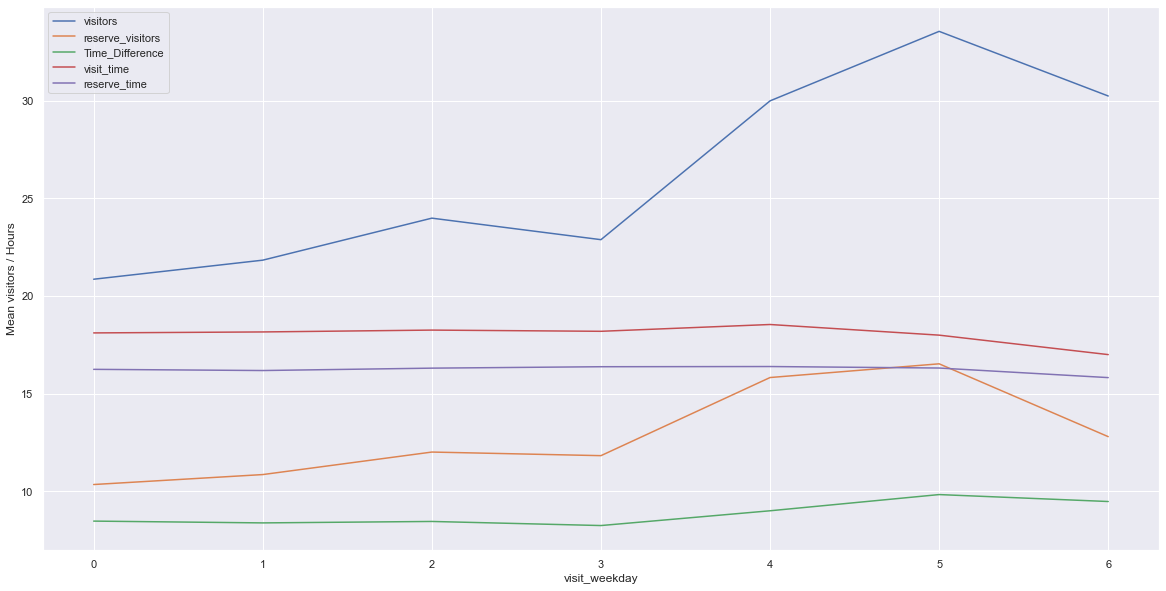

In [22]:
train_data[(train_data.reserve_visitors > 0)].groupby(['visit_weekday']).mean().plot(figsize=(20,10))
plt.ylabel("Mean visitors / Hours")

Text(0, 0.5, 'Mean visitors / Hours')

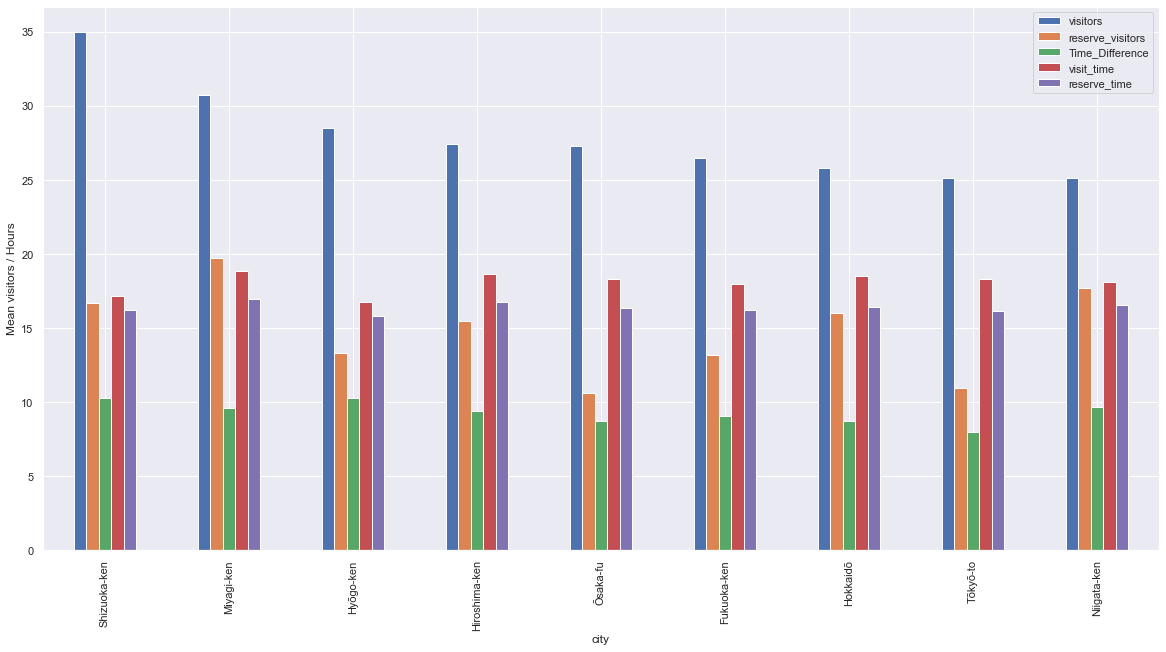

In [24]:
train_data[(train_data.reserve_visitors > 0)].groupby(['city']).mean().sort_values(by='visitors',ascending=False).plot(figsize=(20,10),kind='bar')
plt.ylabel("Mean visitors / Hours")

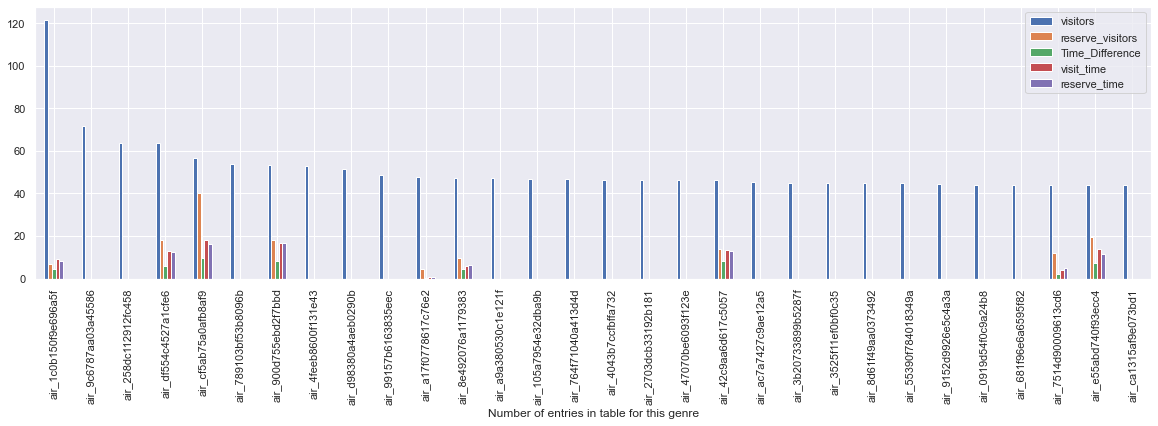

In [25]:
temp = train_data.groupby('air_store_id').mean()
temp.sort_values(by='visitors',ascending=False)[:30].plot(kind='bar',figsize=(20,5))
plt.xlabel("Number of entries in table for this genre")
plt.show()

In [26]:
temp = train_data.groupby('air_store_id').mean()
top10 = temp.sort_values(by='visitors',ascending=False)[:10]
top10

,visitors,reserve_visitors,Time_Difference,visit_time,reserve_time
air_store_id,,,,,
air_1c0b150f9e696a5f,121.694444,6.694444,4.379630,9.055556,8.009259
air_9c6787aa03a45586,71.800000,0.000000,0.000000,0.000000,0.000000
air_258dc112912fc458,63.693333,0.000000,0.000000,0.000000,0.000000
air_df554c4527a1cfe6,63.509934,18.105960,5.774066,12.974415,12.345974
air_cf5ab75a0afb8af9,56.736842,40.052632,9.531919,17.978908,16.190638
air_789103bf53b8096b,53.846154,0.000000,0.000000,0.000000,0.000000
air_900d755ebd2f7bbd,53.200000,18.000000,8.040000,16.845714,16.828571
air_4feeb8600f131e43,52.774648,0.000000,0.000000,0.000000,0.000000
air_d98380a4aeb0290b,51.395122,0.000000,0.000000,0.000000,0.000000


In [27]:
top10 = ['air_1c0b150f9e696a5f','air_9c6787aa03a45586','air_258dc112912fc458','air_df554c4527a1cfe6','air_cf5ab75a0afb8af9', 'air_789103bf53b8096b','air_789103bf53b8096b','air_900d755ebd2f7bbd','air_4feeb8600f131e43','air_d98380a4aeb0290b','air_99157b6163835eec']

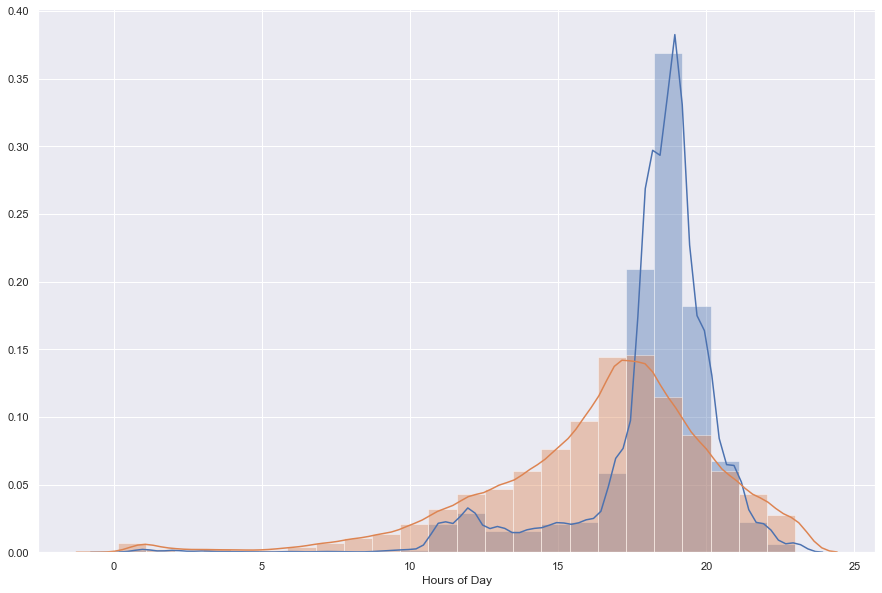

In [37]:
plt.figure(figsize=(15,10))
sns.distplot(train_data_updated[train_data_updated.visit_time > 0].visit_time,bins=24)
sns.distplot(train_data_updated[train_data_updated.reserve_time > 0].reserve_time,bins=24)
plt.xlabel("Hours of Day")
plt.show()

In [31]:
train_data_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239673 entries, 0 to 239672
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   air_store_id      239673 non-null  category      
 1   visit_date        239673 non-null  datetime64[ns]
 2   visitors          239673 non-null  int64         
 3   air_genre_name    239673 non-null  category      
 4   air_area_name     239673 non-null  category      
 5   reserve_visitors  239673 non-null  float64       
 6   Time_Difference   239673 non-null  float64       
 7   visit_time        239673 non-null  float64       
 8   reserve_time      239673 non-null  float64       
 9   visit_year        239673 non-null  int64         
 10  visit_month       239673 non-null  int64         
 11  visit_weekday     239673 non-null  int64         
 12  city              239673 non-null  category      
 13  ward              239673 non-null  category      
 14  neig

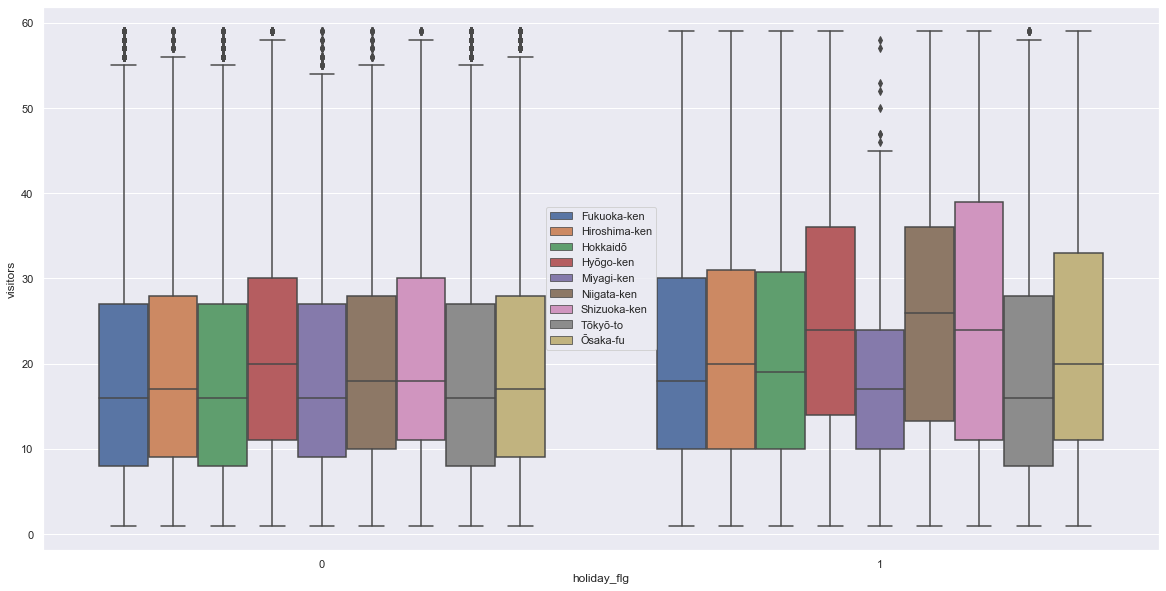

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x='holiday_flg', y='visitors', data=train_data_updated[(train_data_updated.visitors<60)],hue='city')
plt.legend(loc='center')
plt.show()